<a href="https://colab.research.google.com/github/song-gif/DAP__/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##2021 월즈 플레이인 그룹 스테이지 데이터

In [4]:
df = pd.read_csv('/content/League of Legends 2021 World Championship Play-In Groups Statistics - Raw Data.csv')
df
# 220개의 행과 20개의 열이 존재
# 한 경기 당 10행, 총 22경기

,Team,Player,Opponent,Position,Champion,Kills,Deaths,Assists,Creep Score,Gold Earned,Champion Damage Share,Kill Participation,Wards Placed,Wards Destroyed,Ward Interactions,Dragons For,Dragons Against,Barons For,Barons Against,Result
0,UOL,Boss,GS,Top,Camille,4,5,3,188,11107,0.17,0.78,8,8,16,0,4,0,1,L
1,GS,Crazy,UOL,Top,Gwen,3,1,9,217,12201,0.20,0.52,10,7,17,4,0,1,0,W
2,UOL,Ahahacik,GS,Jungle,Trundle,2,4,5,156,9048,0.15,0.78,8,14,22,0,4,0,1,L
3,GS,Mojito,UOL,Jungle,Talon,5,4,10,194,11234,0.23,0.65,12,8,20,4,0,1,0,W
4,UOL,Nomanz,GS,Mid,Leblanc,1,3,4,216,9245,0.29,0.56,6,9,15,0,4,0,1,L
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215,BYG,Maoan,UOL,Mid,Ryze,4,4,2,356,15558,0.23,0.32,24,6,30,4,1,1,1,W
216,UOL,Argonavt,BYG,Adc,Senna,1,3,9,58,9554,0.16,0.71,35,16,51,1,4,1,1,L
217,BYG,Doggo,UOL,Adc,Draven,10,2,4,353,20546,0.38,0.74,15,5,20,4,1,1,1,W
218,UOL,Santas,BYG,Support,Wukong,0,4,7,200,10354,0.11,0.50,16,8,24,1,4,1,1,L


##관심 없는 열 제거

In [5]:
df = df.drop(['Opponent'], axis=1)
df

,Team,Player,Position,Champion,Kills,Deaths,Assists,Creep Score,Gold Earned,Champion Damage Share,Kill Participation,Wards Placed,Wards Destroyed,Ward Interactions,Dragons For,Dragons Against,Barons For,Barons Against,Result
0,UOL,Boss,Top,Camille,4,5,3,188,11107,0.17,0.78,8,8,16,0,4,0,1,L
1,GS,Crazy,Top,Gwen,3,1,9,217,12201,0.20,0.52,10,7,17,4,0,1,0,W
2,UOL,Ahahacik,Jungle,Trundle,2,4,5,156,9048,0.15,0.78,8,14,22,0,4,0,1,L
3,GS,Mojito,Jungle,Talon,5,4,10,194,11234,0.23,0.65,12,8,20,4,0,1,0,W
4,UOL,Nomanz,Mid,Leblanc,1,3,4,216,9245,0.29,0.56,6,9,15,0,4,0,1,L
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215,BYG,Maoan,Mid,Ryze,4,4,2,356,15558,0.23,0.32,24,6,30,4,1,1,1,W
216,UOL,Argonavt,Adc,Senna,1,3,9,58,9554,0.16,0.71,35,16,51,1,4,1,1,L
217,BYG,Doggo,Adc,Draven,10,2,4,353,20546,0.38,0.74,15,5,20,4,1,1,1,W
218,UOL,Santas,Support,Wukong,0,4,7,200,10354,0.11,0.50,16,8,24,1,4,1,1,L


##결측값 확인

In [6]:
df.info()
# 결측값 존재하지 않음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220 entries, 0 to 219
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Team                   220 non-null    object 
 1   Player                 220 non-null    object 
 2   Position               220 non-null    object 
 3   Champion               220 non-null    object 
 4   Kills                  220 non-null    int64  
 5   Deaths                 220 non-null    int64  
 6   Assists                220 non-null    int64  
 7   Creep Score            220 non-null    int64  
 8   Gold Earned            220 non-null    int64  
 9   Champion Damage Share  220 non-null    float64
 10  Kill Participation     220 non-null    float64
 11  Wards Placed           220 non-null    int64  
 12  Wards Destroyed        220 non-null    int64  
 13  Ward Interactions      220 non-null    int64  
 14  Dragons For            220 non-null    int64  
 15  Dragon

##참가 선수 목록

In [7]:
players = df[['Player']]
players = players.drop_duplicates()
players = players.sort_values(by=['Player'] ,ascending=True)
players

,Player
49,Ackerman
63,Aegis
2,Ahahacik
59,Aladoric
50,Ale
7,Alive
6,Argonavt
14,Aria
53,Babip
152,Bapip


#이상값 확인
  위의 출력을 보면 129행의 값이 Leona로 되어있는데 아마 데이터를 입력하는 과정에서 실수가 있었던 것 같다.
 
  또 Zergsting 선수를 Zersting으로 잘못 입력한 것 같은 모습도 볼 수 있다.
  
  object값을 가진 열에 대해 이상값을 관측하고 이상값이 발견되었다면 고쳐준다.

In [8]:
# 팀 이름 이상값 확인
# 팀 이름엔 이상값 관측되지 않음
# 위 4팀은 동점 때문에 한 경기를 더 했기 때문에 이상값이 아님
pd.set_option("max_rows", None)

teams = df[['Team']]
teams = teams.sort_values(by=['Team'] ,ascending=True)
teams['Team'].value_counts()

DFM    25
BYG    25
C9     25
UOL    25
INF    20
LNG    20
GS     20
RED    20
HLE    20
PCE    20
Name: Team, dtype: int64

In [9]:
# 선수 이름 이상값 확인
# 이상값으로 의심되는 값 발견
players = df[['Player']]
players = players.sort_values(by=['Player'] ,ascending=True)
players['Player'].value_counts()

Nomanz        5
Argonavt      5
Aria          5
Steal         5
Doggo         5
Boss          5
Perkz         5
Santas        5
Yutapon       5
Blaber        5
Gaeng         5
Zven          5
Kino          5
Husha         5
Fudge         5
Evi           5
Maoan         5
Ahahacik      5
Deft          4
Iwandy        4
Liang         4
Aladoric      4
Tally         4
Guigo         4
Aegis         4
Mojito        4
Tarzan        4
Morgan        4
Titan         4
Ackerman      4
Bolulu        4
Chovy         4
Solidsnake    4
Grevthar      4
Violet        4
Jojo          4
Whitelotus    4
Ale           4
Buggax        4
Cody          4
Alive         4
Light         4
Crazy         4
Vizicsacsi    4
Vulcan        4
Willer        4
Icon          4
Vsta          3
Babip         3
Zergsting     3
Zersting      1
Bapip         1
Bulcan        1
Pk            1
Leona         1
Name: Player, dtype: int64

In [10]:
# 이상값 4개 관측
# Bulcan -> Vulcan, Leona-> Vsta, Zersting -> Zergsting, Bapip -> Babip
df.loc[df['Player'] == 'Bulcan', 'Player'] = 'Vulcan'
df.loc[df['Player'] == 'Leona', 'Player'] = 'Vsta'
df.loc[df['Player'] == 'Zersting', 'Player'] = 'Zergsting'
df.loc[df['Player'] == 'Bapip', 'Player'] = 'Babip'

players = df[['Player']]
players = players.sort_values(by=['Player'] ,ascending=True)
players['Player'].value_counts()

Nomanz        5
Gaeng         5
Blaber        5
Aria          5
Doggo         5
Vulcan        5
Boss          5
Perkz         5
Santas        5
Yutapon       5
Kino          5
Fudge         5
Evi           5
Zven          5
Maoan         5
Argonavt      5
Steal         5
Ahahacik      5
Husha         5
Deft          4
Aladoric      4
Mojito        4
Morgan        4
Titan         4
Guigo         4
Zergsting     4
Aegis         4
Ackerman      4
Tarzan        4
Liang         4
Tally         4
Chovy         4
Iwandy        4
Vsta          4
Violet        4
Jojo          4
Whitelotus    4
Ale           4
Buggax        4
Babip         4
Alive         4
Grevthar      4
Bolulu        4
Light         4
Crazy         4
Vizicsacsi    4
Willer        4
Cody          4
Solidsnake    4
Icon          4
Pk            1
Name: Player, dtype: int64

In [11]:
# 챔피언 이름 이상값 확인
# 챔피언 이름에도 이상값 관측되지 않음
champions = df[['Champion']]
champions = champions.sort_values(by=['Champion'] ,ascending=False)
champions['Champion'].value_counts()

Miss Fortune    18
Leona           13
Xin Zhao        12
Sylas            9
Jayce            9
Ezreal           9
Rakan            8
Lee Sin          8
Amumu            8
Lucian           6
Leblanc          6
Qiyana           5
Irelia           5
Lillia           5
Camille          4
Orianna          4
Graves           4
Kennen           4
Ryze             3
Aphelios         3
Gnar             3
Jarvan           3
Gangplank        3
Tryndamere       3
Zoe              3
Wukong           3
Braum            3
Taliyah          3
Azir             3
Talon            2
Aatrox           2
Nami             2
Senna            2
Jax              2
Renekton         2
Urgot            2
Sett             2
Thresh           2
Gragas           2
Twisted Fate     2
Zed              2
Karma            1
Bard             1
Sejuani          1
Malphite         1
Olaf             1
Tahm Kench       1
Kaisa            1
Alistar          1
Rell             1
Lissandra        1
Xayah            1
Akali       

## 선수별 cs 비교

Text(0, 0.5, 'Player')

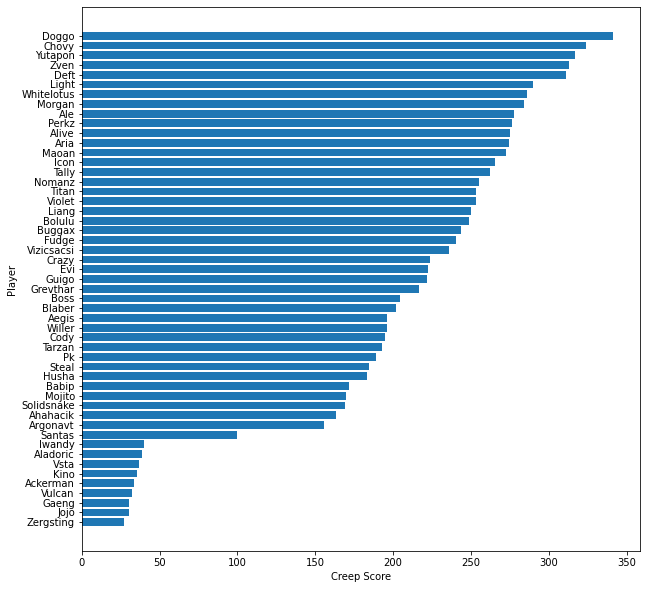

In [15]:
# cs도르                       
mean_df = df.groupby('Player').mean()
mean_df = mean_df.reset_index()
cs_df = mean_df.sort_values(by=['Creep Score'], axis=0, ascending=True)
cs_df = cs_df[['Player', 'Creep Score']]

plt.figure(figsize=(10,10))
plt.barh(cs_df['Player'], cs_df['Creep Score'])
plt.xlabel('Creep Score')
plt.ylabel('Player')
# 대미지 비율 과 킬관여율 관계 corel


# 선수별 kda(평점?)            dash
#-> 경기매치업 팀별 정보 양쪽

# 라인 별 와드 설치 비교       pie? ---- 대미지 기여도로 함

<Figure size 720x720 with 0 Axes>

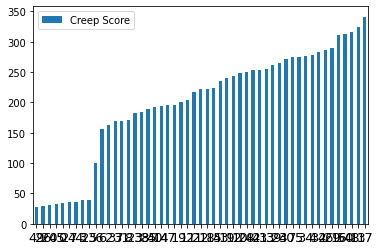

In [14]:
plt.figure(figsize=(10,10))
cs_df.plot(kind='bar')
plt.xticks(rotation=0, fontsize=13)
plt.show()

##라인 별 데미지 기여도

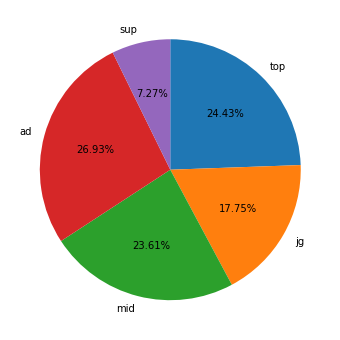

In [270]:
top = df[df['Position'] == 'Top']
jg = df[df['Position'] == 'Jungle']
mid = df[df['Position'] == 'Mid']
ad = df[df['Position'] == 'Adc']
sup = df[df['Position'] == 'Support']

top_damage_share = top['Champion Damage Share'].mean()
jg_damage_share = jg['Champion Damage Share'].mean()
mid_damage_share = mid['Champion Damage Share'].mean()
ad_damage_share = ad['Champion Damage Share'].mean()
sup_damage_share = sup['Champion Damage Share'].mean()

lane = ['top', 'jg', 'mid', 'ad', 'sup']
damage_share = [top_damage_share, jg_damage_share, mid_damage_share, ad_damage_share, sup_damage_share]

fig, ax = plt.subplots(figsize=(6,6))
ax.pie(damage_share, labels = ['top', 'jg', 'mid', 'ad', 'sup'], autopct='%1.2f%%', counterclock=False, startangle=90)
plt.show()

##상관관계

In [ ]:
rel = df[{"Gold Earned", "Kills", "Deaths"}]
rel.corr(method='pearson')


,Gold Earned,Kills,Deaths
Gold Earned,1.000000,0.702605,-0.267229
Kills,0.702605,1.000000,-0.261418
Deaths,-0.267229,-0.261418,1.000000
